In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Normalize the images
train_images = train_images/255.0
test_images = test_images/255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
#Define the model
model = keras.Sequential([keras.layers.Conv2D(64,(3,3), activation="relu", input_shape=(28, 28,1)),
                          keras.layers.MaxPooling2D(2,2), keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])

C:\Users\Sahil\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

#Evaluate the model
test_loss, test_acc=model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 45ms/step - accuracy: 0.8184 - loss: 0.5120
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9044 - loss: 0.2603
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9214 - loss: 0.2102
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.9354 - loss: 0.1747
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9458 - loss: 0.1439
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 94s 50ms/step - accuracy: 0.9544 - loss: 0.1200
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 134s 46ms/step - accuracy: 0.9632 - loss: 0.1031
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.9689 - loss: 0.0855
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 48ms/step - accuracy: 0.9747 - loss: 0.0714
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 49ms/step - accuracy: 0.9779 - loss: 0.0601
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9134 - loss: 0.3682
Test accuracy: 0.91579

In [6]:
# Make predictions
predictions = model.predict(test_images)
predicted_labels =np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


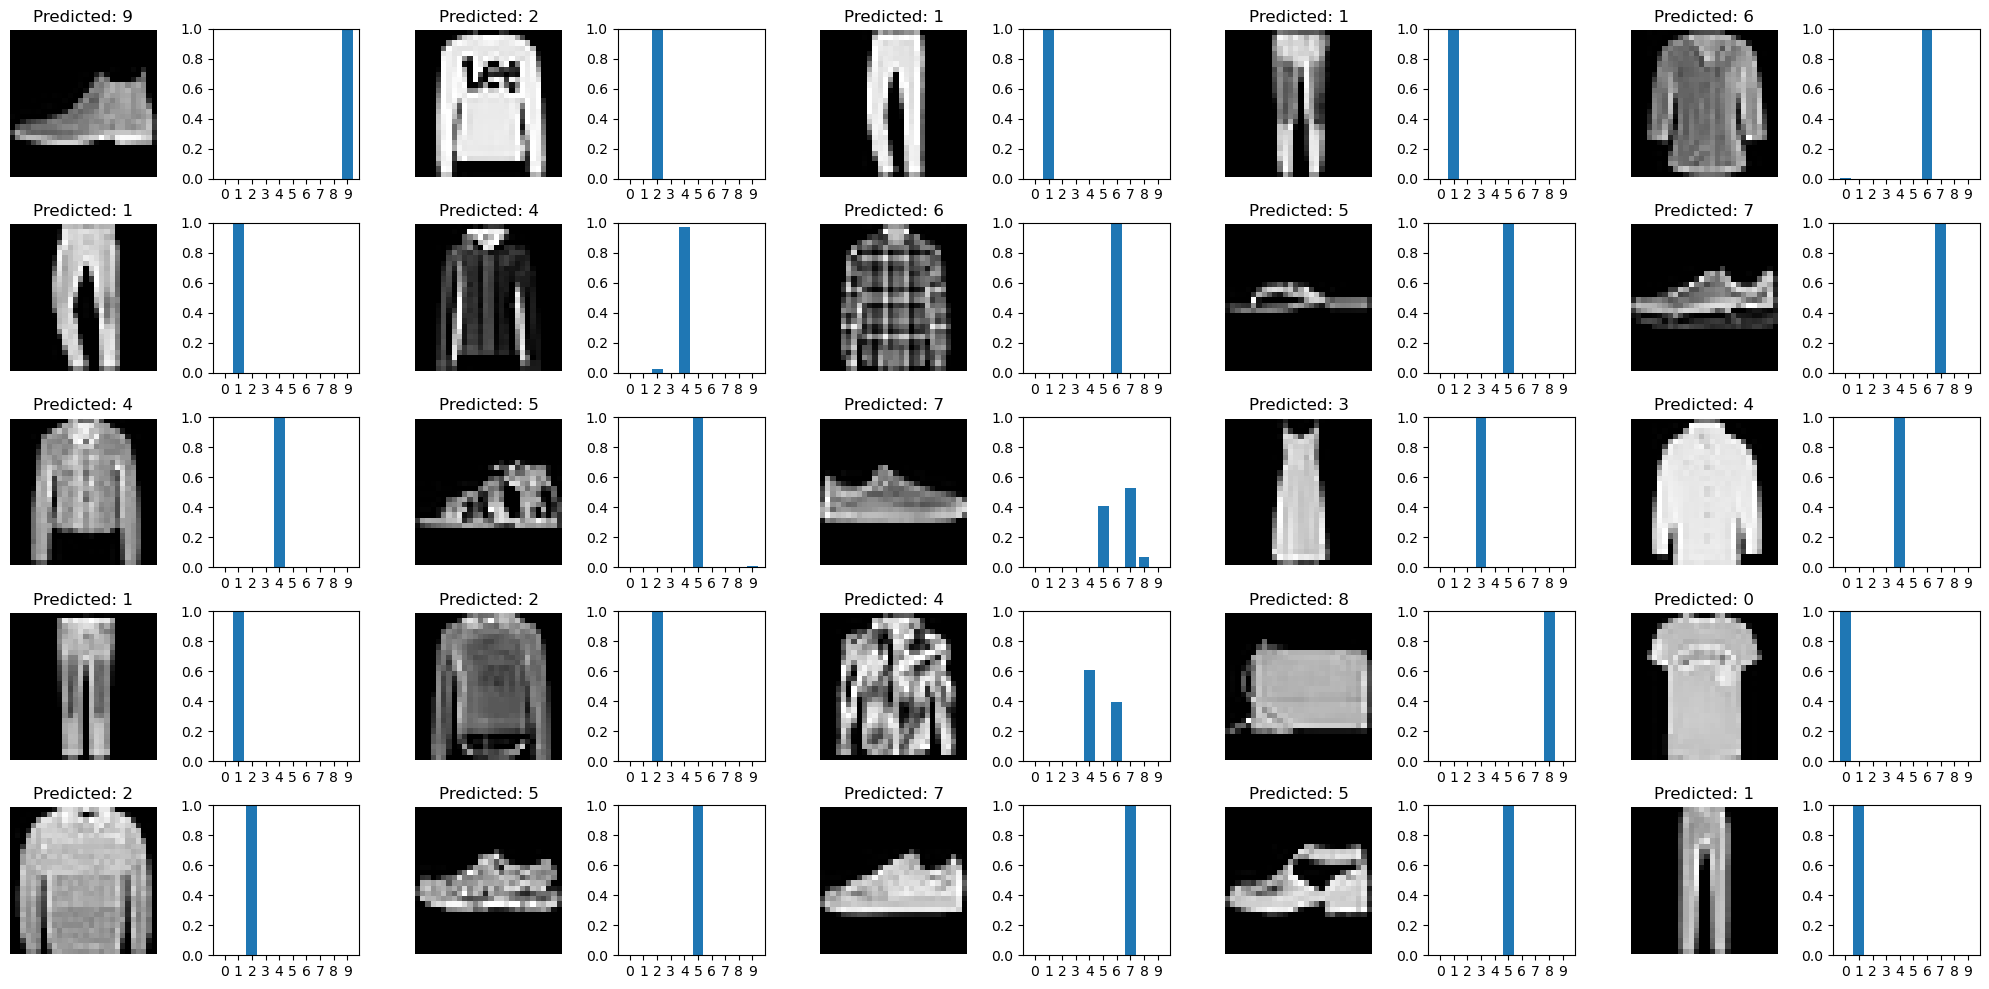

In [7]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    # Plot image
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plt.bar(range(10), predictions[i])
    plt.xticks(range(10))
    plt.ylim([0, 1])

plt.tight_layout()
plt.show()
